In [1]:
import sys
    
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from celluloid import Camera
from IPython.display import HTML

plt.style.use("dark_background")

In [2]:
sys.path.append('../python')
import point_cloud_evolution as evo

In [3]:
# load the point representation that will be the skeleton (or spine) of the logo
spine_pos, spine_width, box = evo.read_target_skeleton( "../data/point_set_LOGO.txt" )

print("Number of spine points:", spine_pos.shape[0])
print("Spine extent [x,y]:\n\t min =", spine_pos.min(axis=0), "\n\t max =", spine_pos.max(axis=0) )

Number of spine points: 83
Spine extent [x,y]:
	 min = [0.29722  0.280305] 
	 max = [2.63889  0.747835]


Number of points:
	 x-axis = 143 
	 y-axis = 51 
	 total  = 7293


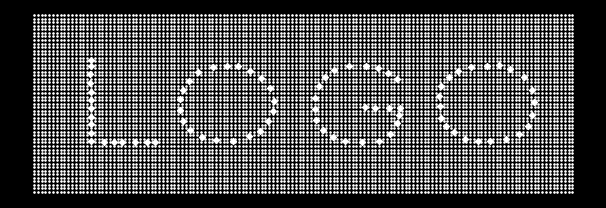

In [4]:
# create a grid distribution of points with random normally distributed velocities that will be used to "construct" the logo

pos0, vel0 = evo.initial_point_cloud(box,step=0.02,vel_sigma=0.2)

fig0 = plt.figure( figsize=(3*box[0],3*box[1]) )
plt.axis('off')
plt.scatter( pos0[:,0], pos0[:,1], marker='.',s=10,c='w' )
plt.scatter( spine_pos[:,0], spine_pos[:,1], marker='D' ,s=20,c='w')

plt.tight_layout()

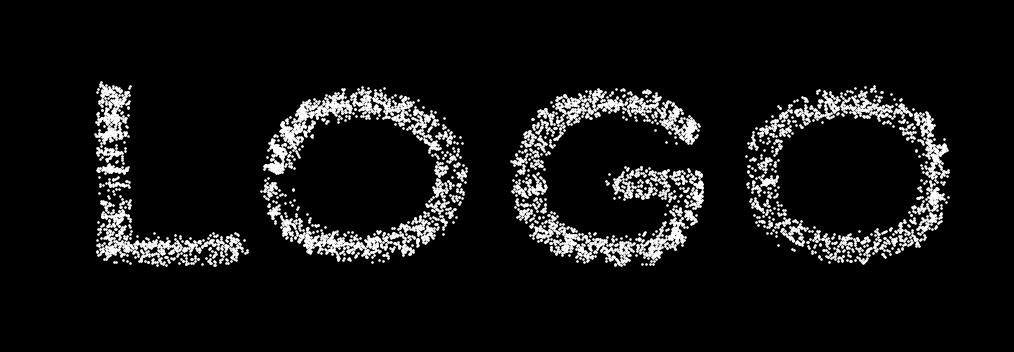

In [9]:
fig = plt.figure( figsize=(5*box[0],5*box[1]) )
camera = Camera(fig)

# starting from the point distribution, construct the logo
camera, pos1, vel1 = evo.evolve_text( camera, pos0, vel0, spine_pos, spine_width, box, timestep=0.1, numTimeSteps=60, viscosityFactor=2., velocityFactor=0.93, plot_settings=evo.set_the_stage )

# shrink the logo to the centre of the image
ref = np.array( (box[0]/2.,box[1]/2.) )
camera, pos2, vel2 = evo.implode_points(camera, pos1, vel1, center=ref, box=box, numPeriods = 0.5, numIterations_perPeriod = 40, plot_settings=evo.set_the_stage)

# now explode the points and spread them evenly accross the image
camera, pos3, vel3 = evo.explode_points(camera, pos2, vel0, box, timestep=0.1, numTimeSteps=10, plot_settings=evo.set_the_stage)

# construct the logo again from the new random distribution of points
vel = vel3 + vel0[::-1]*.3  # take a combination of velocities to remove some unwanted artifacts
camera, pos4, vel4 = evo.evolve_text( camera, pos3, vel, spine_pos, spine_width, box, timestep=0.1, numTimeSteps=60, viscosityFactor=2., velocityFactor=0.93, plot_settings=evo.set_the_stage )

animation = camera.animate()
# animation.save('../figures/LOGO.mp4')
animation.save('../figures/LOGO.gif', writer='imagemagick')
HTML(animation.to_html5_video())


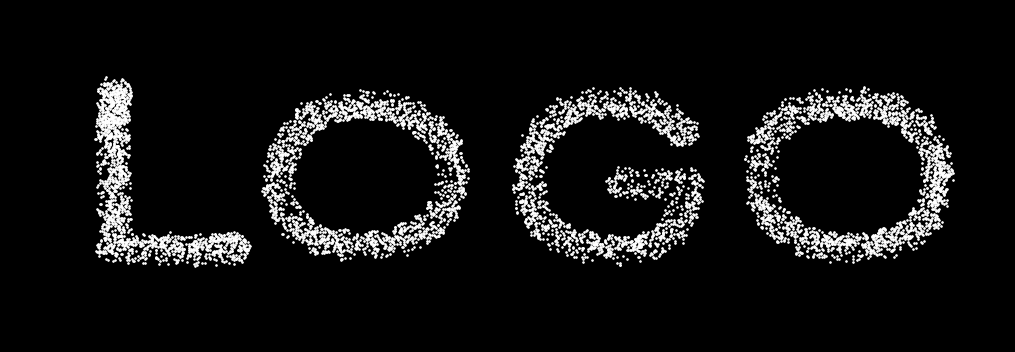

In [10]:
# save the last frame too
fig = plt.figure( figsize=(5*box[0],5*box[1]) )

evo.set_the_stage( box )
plt.scatter( pos1[:,0], pos1[:,1], marker='.',s=10, c='w')
plt.tight_layout()

plt.savefig('../figures/LOGO.png')